<img src="https://logos-world.net/wp-content/uploads/2021/03/Charles-Schwab-Logo-2001-present.png" width=550>

In [100]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import re
import requests
from bs4 import BeautifulSoup

In [101]:
def extract_tag_content(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'lxml')
    
    tag = soup.find_all(class_='bcn-ps-eyebrow eyebrow-category')
    if bool(tag) is True:
        tag = tag[0].text.strip()
        
    else:
        tag = 'N/A'
        
    
    raw_content = soup.find_all(class_='bcn-content--story__body bcn-body--l')
    if bool(raw_content) is True:
        raw_content =  raw_content[0].text
        content = re.sub(r'\s+', ' ', raw_content).strip()
        
    else:
        content = 'N/A'
        
    return tag, content

In [ ]:
schwab_all_list = []

In [ ]:
service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.implicitly_wait(5)
driver.get("https://www.schwab.com/resource-center/insights/?type%5Barticle%5D=article")

for i in range(47):
    link_list = [i.get_attribute('href') for i in driver.find_elements(By.CSS_SELECTOR, "[class='main-content clearfix mq--t'] h4[class='icon icon-article'] a")]
    date_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR, "[class='submitted submitted--article']")]
    abstract_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR, "[class='main-content clearfix mq--t'] [class='field field--name-body field--type-text-with-summary field--label-hidden field__item']")]
    title_list = [i.text for i in driver.find_elements(By.CSS_SELECTOR, "[class='main-content clearfix mq--t'] [class='icon icon-article']")]


    schwab_list = []

    for link, date, abstract, title in zip(link_list, date_list, abstract_list, title_list):
        schwab_dict = {
            "index": "",
            "company": "Charles Schwab",
            "topic": "Insight",
            "tag": extract_tag_content(link)[0],
            "section": "",
            "title": title,
            "date": date,
            "link": link,
            "abstract": abstract,
            "content": extract_tag_content(link)[1]
        }

        schwab_list.append(schwab_dict)
        
    schwab_all_list.append(schwab_list)
    
    next_page = driver.find_element(By.CSS_SELECTOR,"[class='pager__item pager__item--next']")
    next_page.click()

In [106]:
schwab_insight_list = []
for p_8 in schwab_all_list:
    for p in p_8:
        schwab_insight_list.append(p)

[[{'index': '',
   'company': 'Charles Schwab',
   'topic': 'Insight',
   'tag': 'N/A',
   'section': '',
   'title': "Are Jobs Livin' on the Edge?",
   'date': 'SEPTEMBER 06, 2022',
   'link': 'https://www.schwab.com/resource-center/insights/content/are-jobs-livin-on-edge',
   'abstract': "The August jobs report delivered something for both economic bulls and bears, but what matters more in the near term is the Fed's focus on seeing a continued easing in labor demand.",
   'content': 'N/A'},
  {'index': '',
   'company': 'Charles Schwab',
   'topic': 'Insight',
   'tag': 'Options',
   'section': '',
   'title': "Today's Options Market Update",
   'date': 'SEPTEMBER 06, 2022',
   'link': 'https://www.schwab.com/resource-center/insights/content/todays-options-market-update',
   'abstract': 'Stocks mixed around mid-day as investors search for direction.',
   'content': "U.S. stocks are mostly higher after returning to action following the long Labor Day holiday weekend in the wake of som

In [131]:
import json

In [133]:
with open('schwab_insight_dict.json', 'w') as f:
    json.dump(schwab_insight_list,f, indent=4)

In [115]:
df = pd.DataFrame(schwab_insight_list)

In [136]:
df

,index,company,topic,tag,section,title,date,link,abstract,content
0,,Charles Schwab,Insight,N/A,,Are Jobs Livin' on the Edge?,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,The August jobs report delivered something for...,N/A
1,,Charles Schwab,Insight,Options,,Today's Options Market Update,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,Stocks mixed around mid-day as investors searc...,U.S. stocks are mostly higher after returning ...
2,,Charles Schwab,Insight,Futures,,Looking to the Futures,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,"U.S. job data was released last Friday, before...","U.S. job data was released last Friday, before..."
3,,Charles Schwab,Insight,Trading,,Weekly Trader’s Outlook,"SEPTEMBER 02, 2022",https://www.schwab.com/resource-center/insight...,Bond yields appear to be driving investor sent...,Weekly market review U.S. equities are trading...
4,,Charles Schwab,Insight,N/A,,China Q&A: Top 5 Questions,"AUGUST 29, 2022",https://www.schwab.com/resource-center/insight...,"Topics like inflation, currency, and governmen...",N/A
...,...,...,...,...,...,...,...,...,...,...
459,,Charles Schwab,Insight,Financial Planning,,What Do I Need to Know About Estate Taxes?,"JANUARY 21, 2020",https://www.schwab.com/resource-center/insight...,Federal estate taxes apply to only a small fra...,Editors' Note: This article is excerpted from ...
460,,Charles Schwab,Insight,Financial Planning,,Financial Literacy: A Powerful Tool for Social...,"JANUARY 15, 2020",https://www.schwab.com/resource-center/insight...,Financial literacy is a powerful tool for soci...,"Dear Readers, Today I’m departing from my usua..."
461,,Charles Schwab,Insight,Financial Planning,,10 Steps to Financial Security in 2020,"JANUARY 08, 2020",https://www.schwab.com/resource-center/insight...,Are you financially ready for 2020? Here are 1...,"Dear Readers, It's hard to believe we're alrea..."
462,,Charles Schwab,Insight,Financial Planning,,Money Management Tips For Couples Merging Hous...,"JANUARY 07, 2020",https://www.schwab.com/resource-center/insight...,"You're emotionally ready to move in together, ...","Dear Carrie, My girlfriend and I are both fina..."


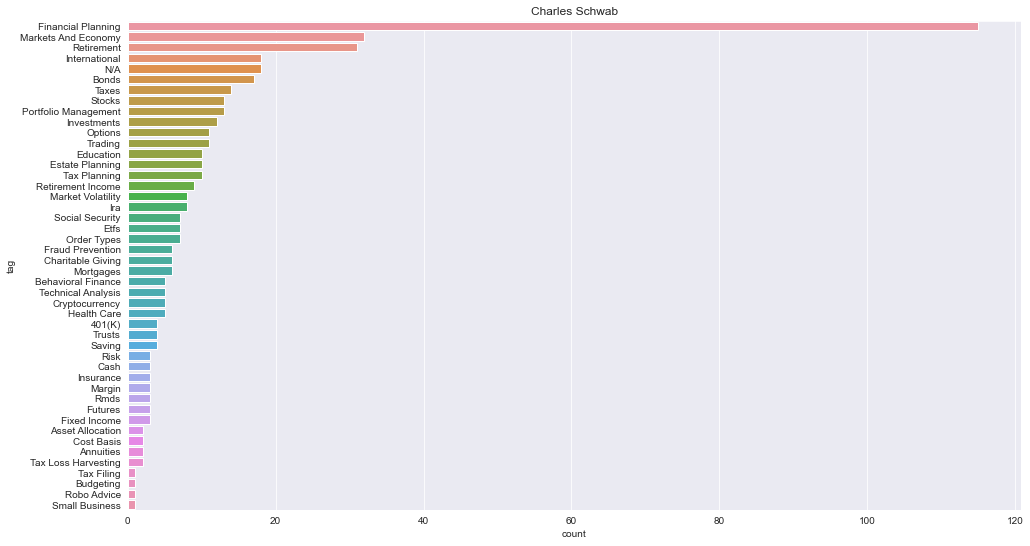

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.figure(figsize=(16,9))
sns.countplot(y=df['tag'], order=df['tag'].value_counts().index)
plt.title('Charles Schwab')
plt.show()

In [90]:
len(schwab_all_list)

6

In [91]:
schwab_insight_list = [[j for j in i] for i in schwab_all_list]

In [134]:
# w3lib.html.remove_tags()

In [89]:
len(vanguard_insight_list)

6

In [93]:
import pandas as pd 

In [95]:
df = pd.read_csv('charls6.csv')

In [139]:
df

,index,company,topic,tag,section,title,date,link,abstract,content
0,,Charles Schwab,Insight,N/A,,Are Jobs Livin' on the Edge?,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,The August jobs report delivered something for...,N/A
1,,Charles Schwab,Insight,Options,,Today's Options Market Update,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,Stocks mixed around mid-day as investors searc...,U.S. stocks are mostly higher after returning ...
2,,Charles Schwab,Insight,Futures,,Looking to the Futures,"SEPTEMBER 06, 2022",https://www.schwab.com/resource-center/insight...,"U.S. job data was released last Friday, before...","U.S. job data was released last Friday, before..."
3,,Charles Schwab,Insight,Trading,,Weekly Trader’s Outlook,"SEPTEMBER 02, 2022",https://www.schwab.com/resource-center/insight...,Bond yields appear to be driving investor sent...,Weekly market review U.S. equities are trading...
4,,Charles Schwab,Insight,N/A,,China Q&A: Top 5 Questions,"AUGUST 29, 2022",https://www.schwab.com/resource-center/insight...,"Topics like inflation, currency, and governmen...",N/A
...,...,...,...,...,...,...,...,...,...,...
459,,Charles Schwab,Insight,Financial Planning,,What Do I Need to Know About Estate Taxes?,"JANUARY 21, 2020",https://www.schwab.com/resource-center/insight...,Federal estate taxes apply to only a small fra...,Editors' Note: This article is excerpted from ...
460,,Charles Schwab,Insight,Financial Planning,,Financial Literacy: A Powerful Tool for Social...,"JANUARY 15, 2020",https://www.schwab.com/resource-center/insight...,Financial literacy is a powerful tool for soci...,"Dear Readers, Today I’m departing from my usua..."
461,,Charles Schwab,Insight,Financial Planning,,10 Steps to Financial Security in 2020,"JANUARY 08, 2020",https://www.schwab.com/resource-center/insight...,Are you financially ready for 2020? Here are 1...,"Dear Readers, It's hard to believe we're alrea..."
462,,Charles Schwab,Insight,Financial Planning,,Money Management Tips For Couples Merging Hous...,"JANUARY 07, 2020",https://www.schwab.com/resource-center/insight...,"You're emotionally ready to move in together, ...","Dear Carrie, My girlfriend and I are both fina..."


In [99]:
df['link'][1]

'/resource-center/insights/content/should-you-dip-into-your-ira-to-buy-first-home'

In [ ]:
https://www.schwab.com/resource-center/insights/content/should-you-dip-into-your-ira-to-buy-first-home